#Analiza rynku nieruchomości w Polsce w pierwszym kwartale 2022 roku.
####Analiza została dokonana w oparciu o próbę ponad 60000 tysięcy ogłoszeń z ponad 600 polskich miast. Ogłoszenia pochodzą z serwisu OLX.pl a dane zostały pobrane z serwisu Kaggle: https://www.kaggle.com/datasets/g1llar/poland-olx-house-price-q122?resource=download
####Analiza zawiera w sobie następujące elementy:
#####• Załadowanie danych do dataframe (z formatu csv)
#####• Zapisanie danych w bazie danych Hive
#####• Wykonanie agregacji i transformacji danych w SQL
#####• Wykonanie agregacji i transformacji danych w Python
#####• Przedstawienie wyników na kilku wykresach

###Celem analizy jest wyjaśnienie i zwizualizowanie różnic oraz dysproporcji jakie wystąpiły na rynku mieszkaniowym w pierwszym kwartale 2022 roku. 
###### Projekt wykonał Hubert Muzyka, nr indeksu: 123062

###Transformacja i czyszczenie danych

##### W międzyczasie załadowane zostały dane do bazy Hive jako ceny1

In [0]:
%sql
CREATE TABLE ceny2_new AS
SELECT *
FROM ceny1
WHERE offer_title IS NOT NULL
AND price IS NOT NULL
AND price_per_meter IS NOT NULL
AND offer_type IS NOT NULL
AND floor IS NOT NULL
AND area IS NOT NULL
AND rooms IS NOT NULL
AND offer_type_of_building IS NOT NULL
AND market IS NOT NULL
AND city_name IS NOT NULL
AND voivodeship IS NOT NULL
AND month IS NOT NULL
AND year IS NOT NULL
AND population IS NOT NULL
AND longitude IS NOT NULL
AND latitude IS NOT NULL;

num_affected_rows,num_inserted_rows


###### W tym kroku wyczyściłem dane z nierozpoznawalnych znaków i zamieniłem je na właściwe

In [0]:
%sql
UPDATE ceny2_new SET city_name = 
  REPLACE(
    REPLACE(
      REPLACE(
        REPLACE(
          REPLACE(
            REPLACE(
              REPLACE(
                REPLACE(
                  REPLACE(
                    REPLACE(
                      REPLACE(
                        REPLACE(
                          REPLACE(
                            REPLACE(
                              REPLACE(
                                city_name,
                                'Ä…',
                                'ą'
                              ),
                              'Ä‡',
                              'ć'
                            ),
                            'Ä™',
                            'ę'
                          ),
                          'Ăł',
                          'ó'
                        ),
                        'Ĺ‚',
                        'ł'
                      ),
                      'ł„',
                      'ń'
                    ),
                    'Ĺš',
                    'ś'
                  ),
                  'Å¼',
                  'ż'
                ),
                'łş',
                'ź'
              ),
              'ł»',
              'ż'
            ),
            'Ó',
            'Ó'
          ),
          'ü',
          'ü'
        ),
        'ä',
        'ä'
      ),
      'Ö',
      'ö'
    ),
    'Ö',
    'Ö'
  );

num_affected_rows
61330


#####Usuwanie danych o marginalnym znaczeniu i zaburzających wyniki

In [0]:
%sql
DELETE FROM ceny2_new 
WHERE voivodeship = 'Ruda ĹšlÄ…ska' OR voivodeship = '3' OR voivodeship = 'aftermarket';

num_affected_rows
12


###### Zamiana angielskich nazw województw na polskie

In [0]:
%sql
UPDATE ceny2_new SET voivodeship =
CASE
WHEN voivodeship = 'Greater Poland' THEN 'Wielkopolskie'
WHEN voivodeship = 'Kuyavia-Pomerania' THEN 'Kujawsko-Pomorskie'
WHEN voivodeship = 'Lesser Poland' THEN 'Małopolskie'
WHEN voivodeship = 'Lodzkie' THEN 'Łódzkie'
WHEN voivodeship = 'Lower Silesia' THEN 'Dolnośląskie'
WHEN voivodeship = 'Lublin' THEN 'Lubelskie'
WHEN voivodeship = 'Lubusz' THEN 'Lubuskie'
WHEN voivodeship = 'Masovia' THEN 'Mazowieckie'
WHEN voivodeship = 'Opole' THEN 'Opolskie'
WHEN voivodeship = 'Pomerania' THEN 'Pomorskie'
WHEN voivodeship = 'Silesia' THEN 'Śląskie'
WHEN voivodeship = 'Subcarpathia' THEN 'Podkarpackie'
WHEN voivodeship = 'Warmia-Masuria' THEN 'Warmińsko-Mazurskie'
WHEN voivodeship = 'West Pomerania' THEN 'Zachodniopomorskie'
ELSE voivodeship
END;

num_affected_rows
61318


In [0]:
%sql
SELECT * FROM ceny2_new

offer_title,price,price_per_meter,offer_type,floor,area,rooms,offer_type_of_building,market,city_name,voivodeship,month,year,population,longitude,latitude
Kawalerka na sprzedaĹĽ,240000,8888.89,Private,1,27,1.0,Housing Block,primary,Bolesławiec,Dolnośląskie,January,2022,39603,15.5651049,51.2630333
Nowoczesna kawalerka z winda plus garaĹĽ podziemny,250000,7142.86,Private,1,35,1.0,Housing Block,primary,Jelcz-Laskowice,Dolnośląskie,January,2022,15828,17.3499638,51.0398306
Nowa kawalerka z Balkonem/Legnicka/Magnolia,259000,10360,Estate Agency,2,25,1.0,Housing Block,primary,Wrocław,Dolnośląskie,January,2022,634487,17.0326689,51.1089776
Kawalerka z balkonem/klucze I kwartaĹ‚ 2022/60 tyĹ› taniej niĹĽ u dewelop,269000,10275.02,Private,3,26.18,1.0,Apartment Building,primary,Wrocław,Dolnośląskie,January,2022,634487,17.0326689,51.1089776
40 tys. taniej od dewelopera/Kawalerka/Magnolia/Legnicka,258000,9923.08,Estate Agency,3,26,1.0,Housing Block,primary,Wrocław,Dolnośląskie,January,2022,634487,17.0326689,51.1089776
Mieszkanie na start,255000,11283.19,Private,3,22.6,1.0,Housing Block,primary,Wrocław,Dolnośląskie,January,2022,634487,17.0326689,51.1089776
Okazja! Na sprzedaĹĽ nowa kawalerka przy Odrze w centrum WrocĹ‚awia!,416120,12975.37,Estate Agency,5,32.07,1.0,Apartment Building,primary,Wrocław,Dolnośląskie,January,2022,634487,17.0326689,51.1089776
"Bulwary Staromiejskie, kawalerka z balkonem widok na OdrÄ™ i park",275900,14913.51,Estate Agency,4,18.5,1.0,Apartment Building,primary,Wrocław,Dolnośląskie,January,2022,634487,17.0326689,51.1089776
Sprzedam punkt w Pasazu ZieliĹ„skiego,1000,100,Private,0,10,1.0,Other,primary,Wrocław,Dolnośląskie,January,2022,634487,17.0326689,51.1089776
Mieszkanie sprzedam,275000,9482.76,Private,2,29,1.0,Apartment Building,primary,Brodnica,Kujawsko-Pomorskie,January,2022,28579,19.3993626,53.258092


#Agregacja danych w SQL

In [0]:

%sql
SELECT voivodeship, AVG(price) as avg_price, AVG(price_per_meter) as avg_price_per_meter, AVG(rooms) as avg_rooms
FROM ceny2_new
WHERE voivodeship IS NOT NULL
GROUP BY voivodeship

voivodeship,avg_price,avg_price_per_meter,avg_rooms
Podkarpackie,328066.85396641574,7051.568390272144,2.578459756803706
Lubelskie,380971.54462137085,7371.391130382775,2.6776315789473686
Warmińsko-Mazurskie,337103.5970149254,6105.680814111262,2.6316146540027137
Mazowieckie,519092.40093549807,10211.12025513584,2.5106030483764084
Dolnośląskie,405669.43466619693,7402.047324291001,2.5346133521225997
Wielkopolskie,351665.534188851,6545.300930602962,2.584755403868032
Podlaskie,385160.7679738562,7323.476653594772,2.6091503267973857
Kujawsko-Pomorskie,324304.0276358958,6379.822036024448,2.5210678674815052
Pomorskie,459894.17189781024,8508.962259600132,2.5515709298635354
Lubuskie,299846.9717552118,5341.063739071957,2.6348352387357097


######Eksport tabeli do pliku csv

In [0]:
df = spark.table("ceny2_new")
df.write.format("csv").save("/FileStore/ceny2_new.csv")

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-3059972431320648> in <cell line: 2>()
      1 df = spark.table("ceny2_new")
----> 2 df.write.format("csv").save("/FileStore/ceny2_new.csv")

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/sql/readwriter.py in save(self, path, format, mode, partitionBy, **options)
    966             self._jwrite.save()
    967         else:
--> 968             self._jwrite.save(path)
    969 
    970     @since(1.4)

/databricks/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py in __call__(se

#Agregacja w Pythonie

In [0]:
from pyspark.sql.functions import monotonically_increasing_id


file_location = "/FileStore/ceny2_new.csv"
file_type = "csv"
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

new_columns = ["offer_title", "price", "price_per_meter", "offer_type", "floor", "area",
               "rooms", "offer_type_of_building", "market", "city_name", "voivodeship",
               "month", "year", "population", "longitude", "latitude"]

for i, col_name in enumerate(new_columns):
    df = df.withColumnRenamed(f"_c{i}", col_name)

# Dropping the first row
df = df.filter(monotonically_increasing_id() > 0)

display(df)


offer_title,price,price_per_meter,offer_type,floor,area,rooms,offer_type_of_building,market,city_name,voivodeship,month,year,population,longitude,latitude
"2 pokojowe mieszkanie po kapitalnym remoncie 52,3m 2",339950,6500,Private,0,52.3,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
Rewelacyjne mieszkanie na TysiÄ…cleciu od zaraz,389000,7284.64,Estate Agency,3,53.4,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
Mieszkanie IĹ‚Ĺ‚akowiczĂłwny,238000,6611.11,Estate Agency,0,36,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
sprzedaĹĽ mieszkania,225000,5555.56,Private,3,40.5,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
Syndyk sprzeda udziaĹ‚ w nieruchomoĹ›ci lokalowej,228000,4818.26,Private,1,47.32,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
"Mieszkanie Parkitka, ul. Jerzego Szajnowicza-Iwanowa",330000,7021.28,Private,2,47,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
"M3, Trzech wieszczĂłw, 45m2",250000,5555.56,Private,2,45,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
"Jasne, przytulne, bez poĹ›rednikĂłw",310000,6200,Private,4,50,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
"Mieszkanie do wprowadzenia, bez poĹ›rednikĂłw",295000,6541.02,Private,3,45.1,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466
"Sprzedam 2 pokojowe na TysiÄ…cleciu, 2 piÄ™tro",224900,5158.26,Estate Agency,2,43.6,2.0,Housing Block,aftermarket,Częstochowa,Śląskie,February,2022,232318,19.113213,50.8120466


In [0]:
from pyspark.sql.functions import col
df = df.filter((col("offer_type") == "Estate Agency") | (col("offer_type") == "Private"))

In [0]:
from pyspark.sql.functions import when

df = df.withColumn("population_category",
                   when(df["population"] <= 50000, "do 50 tysięcy")
                   .when((df["population"] > 50000) & (df["population"] <= 100000), "między 50 a 100 tysięcy")
                   .when((df["population"] > 100000) & (df["population"] <= 250000), "między 100 a 250 tysięcy")
                   .when((df["population"] > 250000) & (df["population"] <= 500000), "między 250 tysięcy a 500 tysięcy")
                   .otherwise("powyżej 500 tysięcy"))

###Analiza eksploracyjna danych

In [0]:
#Podstawowe statystki zbioru danych plus dodanie kolumny population_category
from pyspark.sql import Window
from pyspark.sql.functions import count, avg, percentile_approx

df_agg = df.groupby("population_category").agg(
    avg("price_per_meter").alias("średnia cena za metr"),
    avg("area").alias("średnia powierzchnia"),
    count("*").alias("liczba mieszkań"),
    percentile_approx(df["price_per_meter"], 0.5, 1000).alias("mediana ceny za metr")
)
df_agg.show()

+--------------------+--------------------+--------------------+---------------+--------------------+
| population_category|średnia cena za metr|średnia powierzchnia|liczba mieszkań|mediana ceny za metr|
+--------------------+--------------------+--------------------+---------------+--------------------+
| powyżej 500 tysięcy|  10474.060907412653|  124.24176015336566|          14084|             10227.7|
|między 100 a 250 ...|  6451.5390585070545|   55.72466039004706|          10409|             6315.07|
|       do 50 tysięcy|   6306.056650294248|   82.44060377183634|          21581|             5686.27|
|między 50 a 100 t...|   5818.867560894966|  125.39301774495752|           9073|             5722.22|
|między 250 tysięc...|    9937.29969839469|   56.57434084644076|           6167|              8166.0|
+--------------------+--------------------+--------------------+---------------+--------------------+



#####Gdzie mieszkania mają średnio największy metraż?

In [0]:
from pyspark.sql.functions import expr
from pyspark.sql.functions import percentile_approx

df_median = df.groupBy("voivodeship") \
              .agg(percentile_approx(df["area"], 0.5).alias("median_area"))

result = df_median.select("voivodeship", "median_area")
result.show()

+-------------------+-----------+
|        voivodeship|median_area|
+-------------------+-----------+
|       Podkarpackie|       51.0|
|          Lubelskie|       53.6|
|Warmińsko-Mazurskie|       54.5|
|        Mazowieckie|       52.0|
|       Dolnośląskie|       53.9|
|      Wielkopolskie|       52.0|
|          Podlaskie|       50.0|
| Kujawsko-Pomorskie|       49.0|
|          Pomorskie|       52.0|
|           Lubuskie|       54.2|
|            Łódzkie|      48.17|
|        Małopolskie|      49.44|
|            Śląskie|       50.0|
| Zachodniopomorskie|       53.3|
|           Opolskie|       53.0|
|     Świętokrzyskie|       50.0|
+-------------------+-----------+



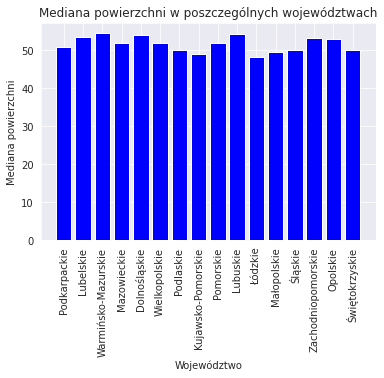

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import functions as F

df_aggregated = df.groupBy("voivodeship").agg(F.percentile_approx("area", 0.5).alias("median_area"))
result = df_aggregated.select("voivodeship", "median_area")
result = result.toPandas()

voivodeships = result['voivodeship'].tolist()
medians = result['median_area'].tolist()

plt.bar(voivodeships, medians, color='blue')
plt.title("Mediana powierzchni w poszczególnych województwach")
plt.xticks(rotation=90)
plt.xlabel("Województwo")
plt.ylabel("Mediana powierzchni")
plt.show()

#####Procentowy rozkład mieszkań w rodzajach miast

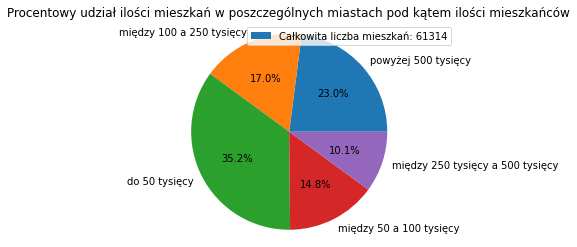

In [0]:


import matplotlib.pyplot as plt
from pyspark.sql import Window
from pyspark.sql.functions import count, avg, percentile_approx

df_agg = df.groupby("population_category").agg(
avg("price_per_meter").alias("średnia cena za metr"),
avg("area").alias("średnia powierzchnia"),
count("*").alias("liczba mieszkań"),
percentile_approx(df["price_per_meter"], 0.5, 1000).alias("mediana ceny za metr")
)
df_agg = df_agg.toPandas()

total = df_agg["liczba mieszkań"].sum()
plt.pie(df_agg["liczba mieszkań"], labels=df_agg["population_category"], autopct='%1.1f%%')
plt.title("Procentowy udział ilości mieszkań w poszczególnych miastach pod kątem ilości mieszkańców")
plt.legend(["Całkowita liczba mieszkań: " + str(total)])
plt.axis('equal')
plt.show()

In [0]:
#Różnice w cenach za metr kwadratowy przez agencje oraz przez osoby prywatne
result.groupBy("voivodeship") \
       .pivot("offer_type") \
       .agg(avg("avg_price_per_meter")) \
       .display()

voivodeship,Estate Agency,Private
Podkarpackie,10211.788294797687,6259.797146994928
Lubelskie,7353.516688851914,6926.156354014603
Warmińsko-Mazurskie,6378.4360543131,6032.147316968133
Mazowieckie,11600.179501517121,9736.159579072179
Dolnośląskie,8401.896563593926,6969.611897552369
Wielkopolskie,6492.2814294670825,6575.503110714282
Podlaskie,8016.7902739726005,7207.659961861175
Kujawsko-Pomorskie,6945.883506849316,6206.125157629259
Pomorskie,8689.673992805752,8443.915394907206
Lubuskie,5292.248181818182,5353.247117647054


#####Średnie ceny mieszkań w poszczególnych województwach:

In [0]:
from pyspark.sql.functions import avg

voivodeship_avg_price = df.groupBy("voivodeship") \
  .agg(avg("price").alias("Średnia cena"))
  
print("Średnie ceny mieszkań w poszczególnych województwach:")
display(voivodeship_avg_price)

Średnie ceny mieszkań w poszczególnych województwach:


voivodeship,Średnia cena
Podkarpackie,328066.85396641574
Lubelskie,380971.54462137085
Warmińsko-Mazurskie,337103.5970149254
Mazowieckie,519092.40093549807
Dolnośląskie,405669.43466619693
Wielkopolskie,351665.534188851
Podlaskie,385160.7679738562
Kujawsko-Pomorskie,324304.0276358958
Pomorskie,459894.17189781024
Lubuskie,299846.9717552118


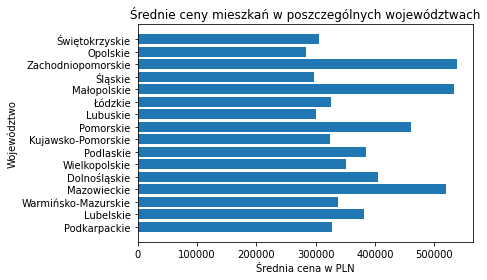

In [0]:
#Wykres o średnich cenach mieszkań w poszczególnych województwach
import matplotlib.pyplot as plt

voivodeship_avg_price_dict = voivodeship_avg_price.rdd.collectAsMap()
voivodeships = list(voivodeship_avg_price_dict.keys())
avg_prices = list(voivodeship_avg_price_dict.values())

plt.barh(voivodeships, avg_prices)
plt.ylabel("Województwo")
plt.xlabel("Średnia cena w PLN")
plt.title("Średnie ceny mieszkań w poszczególnych województwach")

plt.show()

######Gdzie jest najwięcej mieszkań do sprzedaży?

In [0]:
from pyspark.sql.functions import count
df_aggregated = df.groupBy("voivodeship") \
                  .agg(count("*").alias("count"))

result = df_aggregated.select("voivodeship", "count")
result.show()

+-------------------+-----+
|        voivodeship|count|
+-------------------+-----+
|       Podkarpackie| 1727|
|          Lubelskie| 3341|
|Warmińsko-Mazurskie| 2948|
|        Mazowieckie| 9054|
|       Dolnośląskie| 5677|
|      Wielkopolskie| 4395|
|          Podlaskie| 1530|
| Kujawsko-Pomorskie| 3109|
|          Pomorskie| 3151|
|           Lubuskie| 1487|
|            Łódzkie| 5693|
|        Małopolskie| 4856|
|            Śląskie| 7492|
| Zachodniopomorskie| 3749|
|           Opolskie| 1521|
|     Świętokrzyskie| 1584|
+-------------------+-----+



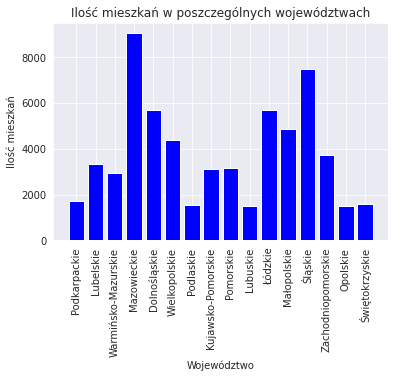

In [0]:
import matplotlib.pyplot as plt
import numpy as np

df_aggregated = df.groupBy("voivodeship").agg(count("*").alias("count"))
result = df_aggregated.select("voivodeship", "count")
result = result.toPandas()

voivodeships = result['voivodeship'].tolist()
counts = result['count'].tolist()

plt.bar(voivodeships, counts, color='blue')
plt.title("Ilość mieszkań w poszczególnych województwach")
plt.xticks(rotation=90)
plt.xlabel("Województwo")
plt.ylabel("Ilość mieszkań")
plt.show()


######Ile średnio kosztuje metr mieszkania w różnych typach budynków?

In [0]:
from pyspark.sql.functions import avg
df_aggregated = df.groupBy("offer_type_of_building") \
                  .agg(avg("price_per_meter").alias("średnia cena za metr"))

result = df_aggregated.select("offer_type_of_building", "średnia cena za metr")
result.show()

+----------------------+--------------------+
|offer_type_of_building|średnia cena za metr|
+----------------------+--------------------+
|                  Loft|    8328.86403846154|
|                 Other|   6039.829808718858|
|         Housing Block|   7541.799188954992|
|              Tenement|   6323.540029765308|
|    Apartment Building|    10109.7514301413|
+----------------------+--------------------+



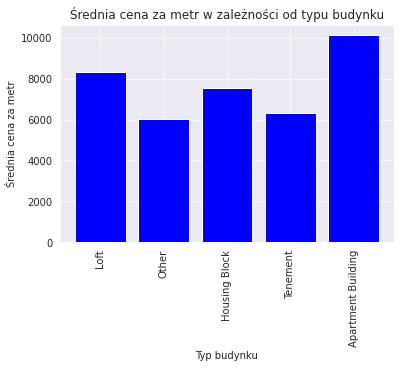

In [0]:
import matplotlib.pyplot as plt
import numpy as np

df_aggregated = df.groupBy("offer_type_of_building") \
                  .agg(avg("price_per_meter").alias("średnia_cena_za_metr"))
result = df_aggregated.select("offer_type_of_building", "średnia_cena_za_metr")
result = result.toPandas()

offer_types = result['offer_type_of_building'].tolist()
prices = result['średnia_cena_za_metr'].tolist()

plt.bar(offer_types, prices, color='blue')
plt.title("Średnia cena za metr w zależności od typu budynku")
plt.xticks(rotation=90)
plt.xlabel("Typ budynku")
plt.ylabel("Średnia cena za metr")
plt.show()

######Czy tańsze są mieszkania z rynku wtórnego czy pierwotnego?

In [0]:
from pyspark.sql.functions import avg
df_aggregated = df.groupBy("market") \
                  .agg(avg("price_per_meter").alias("avg_price_per_meter"))

result = df_aggregated.select("market", "avg_price_per_meter")
result.show()

+-----------+-------------------+
|     market|avg_price_per_meter|
+-----------+-------------------+
|aftermarket|  7589.411132302546|
|    primary|  7521.345857162405|
+-----------+-------------------+



##Podsumowanie
##### Rynek mieszkaniowy w Polsce jest zróżnicowany najbardziej pod kątem geograficznym. Najdroższe mieszkania znajdują się w województwie mazowieckim, małopolskim i zachodniopomorskim. Statystycznie najwięcej pokojów na mieszkanie jest w województwie lubelskim a najmniej w województwie łódzkim. Mediana powierzchni mówi, że największe mieszkania znajdują się w województwie warmińsko-mazurskim a najmniejsze w łódzkim. Najwięcej mieszkań jest w województwie mazowieckim oraz śląskim a najmniej w lubuskim i opolskim. Najdroższe mieszkania to mieszkania typu apartament a najtańsze to te o niezdefiniowanym typie. Jeśli chodzi o rynek zbytu to mieszkania z rynku primary są tańsze o 0.9% w porównaniu do mieszkań z rynku aftermarket. Zdecydowanie bardziej też opłaca się kupować mieszkania z rąk prywatnych aniżeli od agencji w każdym z województw.